In [1]:
import pandas as pd
import wrangle_wine as w

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats

from sklearn.cluster import KMeans
import clustering_evaluation as e

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score

import warnings
warnings.filterwarnings("ignore")

import explore

In [2]:
def get_red_wine():

    red_wine_df = pd.read_csv('winequality-red.csv')
    return red_wine_df

In [3]:
def get_white_wine():

    white_wine_df = pd.read_csv('winequality-white.csv')
    return white_wine_df

In [4]:
white_wine_df = get_white_wine()
white_wine_df.shape

(4898, 12)

In [5]:
red_wine_df = get_red_wine()
red_wine_df.shape

(1599, 12)

In [6]:
white_wine_df['red_or_white'] = 'white'
white_wine_df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_or_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white


In [7]:
red_wine_df['red_or_white'] = 'red'
red_wine_df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_or_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red


In [8]:
pd.merge(red_wine_df, white_wine_df, how='outer')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_or_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [9]:
df = w.merge_wine()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_or_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red


In [10]:
w.summarize(df)

                    SUMMARY REPORT


Dataframe head: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_or_white
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red




Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_or_white          6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


""




Dataframe Description: 


,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


DataFrame value counts: 


,fixed acidity
"(3.787, 5.01]",63
"(5.01, 6.22]",1151
"(6.22, 7.43]",3248
"(7.43, 8.64]",1339
"(8.64, 9.85]",382
"(9.85, 11.06]",177
"(11.06, 12.27]",82
"(12.27, 13.48]",41
"(13.48, 14.69]",7
"(14.69, 15.9]",7


,volatile acidity
"(0.0775, 0.23]",1580
"(0.23, 0.38]",3100
"(0.38, 0.53]",898
"(0.53, 0.68]",606
"(0.68, 0.83]",218
"(0.83, 0.98]",66
"(0.98, 1.13]",23
"(1.13, 1.28]",3
"(1.28, 1.43]",2
"(1.43, 1.58]",1


,citric acid
"(-0.00266, 0.166]",766
"(0.166, 0.332]",3113
"(0.332, 0.498]",2059
"(0.498, 0.664]",420
"(0.664, 0.83]",126
"(0.83, 0.996]",5
"(0.996, 1.162]",6
"(1.162, 1.328]",1
"(1.328, 1.494]",0
"(1.494, 1.66]",1


,residual sugar
"(0.534, 7.12]",4551
"(7.12, 13.64]",1396
"(13.64, 20.16]",533
"(20.16, 26.68]",14
"(26.68, 33.2]",2
"(33.2, 39.72]",0
"(39.72, 46.24]",0
"(46.24, 52.76]",0
"(52.76, 59.28]",0
"(59.28, 65.8]",1


,chlorides
"(0.0073999999999999995, 0.0692]",5061
"(0.0692, 0.129]",1279
"(0.129, 0.19]",92
"(0.19, 0.25]",34
"(0.25, 0.31]",8
"(0.31, 0.37]",9
"(0.37, 0.43]",10
"(0.43, 0.491]",2
"(0.491, 0.551]",0
"(0.551, 0.611]",2


,free sulfur dioxide
"(0.711, 29.8]",3392
"(29.8, 58.6]",2676
"(58.6, 87.4]",401
"(87.4, 116.2]",20
"(116.2, 145.0]",6
"(145.0, 173.8]",1
"(173.8, 202.6]",0
"(202.6, 231.4]",0
"(231.4, 260.2]",0
"(260.2, 289.0]",1


,total sulfur dioxide
"(5.5649999999999995, 49.4]",1088
"(49.4, 92.8]",979
"(92.8, 136.2]",2049
"(136.2, 179.6]",1514
"(179.6, 223.0]",730
"(223.0, 266.4]",125
"(266.4, 309.8]",8
"(309.8, 353.2]",2
"(353.2, 396.6]",1
"(396.6, 440.0]",1


,density
"(0.986, 0.992]",1599
"(0.992, 0.997]",3645
"(0.997, 1.003]",1241
"(1.003, 1.008]",9
"(1.008, 1.013]",2
"(1.013, 1.018]",0
"(1.018, 1.023]",0
"(1.023, 1.029]",0
"(1.029, 1.034]",0
"(1.034, 1.039]",1


,pH
"(2.718, 2.849]",16
"(2.849, 2.978]",334
"(2.978, 3.107]",1233
"(3.107, 3.236]",2111
"(3.236, 3.365]",1663
"(3.365, 3.494]",802
"(3.494, 3.623]",263
"(3.623, 3.752]",59
"(3.752, 3.881]",12
"(3.881, 4.01]",4


,sulphates
"(0.217, 0.398]",1023
"(0.398, 0.576]",3451
"(0.576, 0.754]",1540
"(0.754, 0.932]",382
"(0.932, 1.11]",66
"(1.11, 1.288]",21
"(1.288, 1.466]",6
"(1.466, 1.644]",4
"(1.644, 1.822]",0
"(1.822, 2.0]",4


,alcohol
"(7.992, 8.69]",40
"(8.69, 9.38]",1133
"(9.38, 10.07]",1662
"(10.07, 10.76]",1156
"(10.76, 11.45]",1096
"(11.45, 12.14]",624
"(12.14, 12.83]",569
"(12.83, 13.52]",175
"(13.52, 14.21]",41
"(14.21, 14.9]",1


,quality
"(2.9930000000000003, 3.6]",30
"(3.6, 4.2]",216
"(4.2, 4.8]",0
"(4.8, 5.4]",2138
"(5.4, 6.0]",2836
"(6.0, 6.6]",0
"(6.6, 7.2]",1079
"(7.2, 7.8]",0
"(7.8, 8.4]",193
"(8.4, 9.0]",5


,red_or_white
white,4898
red,1599


nulls in dataframe by column: 


,num_rows_missing,percent_rows_missing
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


nulls in dataframe by row: 


,num_cols_missing,percent_cols_missing
0,0,0.0
4328,0,0.0
4338,0,0.0
4337,0,0.0
4336,0,0.0
...,...,...
2163,0,0.0
2162,0,0.0
2161,0,0.0
2160,0,0.0


In [11]:
df = w.remove_outliers(df)

In [12]:
6497 - df.shape[0]

1663

In [13]:
df.quality.value_counts()

6    2260
5    1512
7     925
4     137
Name: quality, dtype: int64

In [14]:
w.get_dummies(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white_wine
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5,0
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,0
10,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,0
11,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.99590,3.28,0.54,9.2,5,0
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [15]:
train, validate, test = w.split_data(df, 'quality')

- There appears to be a strong correlation between 'alcohol' and 'quality'

- There also appears to be a negative correlation between 'chlorides', 'density' and 'quality'

In [16]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red_or_white'],
      dtype='object')

In [17]:
train, validate, test, train_scaled, validate_scaled, test_scaled = w.wrangle_wine()

In [18]:
train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,white_wine
2024,0.469388,0.228070,0.428571,0.473373,0.378947,0.472973,0.859438,0.568197,0.542169,0.507937,0.357143,6,1
429,0.897959,0.771930,0.517857,0.041420,0.642105,0.094595,0.092369,0.732694,0.530120,0.603175,0.160714,5,0
4625,0.755102,0.245614,0.464286,0.491124,0.157895,0.202703,0.445783,0.510624,0.228916,0.190476,0.375000,6,1
1092,0.469388,0.807018,0.089286,0.082840,0.757895,0.108108,0.036145,0.526388,0.759036,0.587302,0.553571,6,0
4422,0.591837,0.333333,0.535714,0.260355,0.326316,0.216216,0.196787,0.255655,0.313253,0.412698,0.714286,6,1


In [19]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,white_wine
2024,7.0,0.21,0.28,8.6,0.045,37.0,221.0,0.99540,3.25,0.54,10.4,6,1
429,9.1,0.52,0.33,1.3,0.070,9.0,30.0,0.99780,3.24,0.60,9.3,5,0
4625,8.4,0.22,0.30,8.9,0.024,17.0,118.0,0.99456,2.99,0.34,10.5,6,1
1092,7.0,0.54,0.09,2.0,0.081,10.0,16.0,0.99479,3.43,0.59,11.5,6,0
4422,7.6,0.27,0.34,5.0,0.040,18.0,56.0,0.99084,3.06,0.48,12.4,6,1


cat_cols: ['quality', 'white_wine']
num_cols: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Univariate assessment of feature quality:


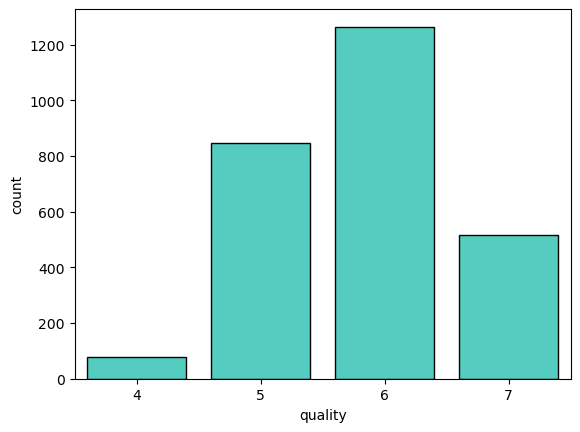

Univariate assessment of feature white_wine:


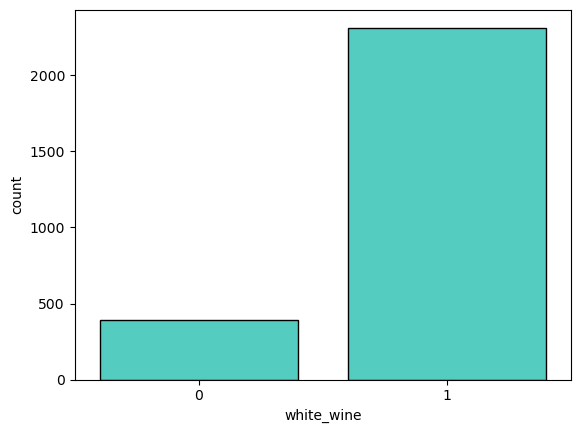

Univariate feature analysis of feature fixed_acidity: 


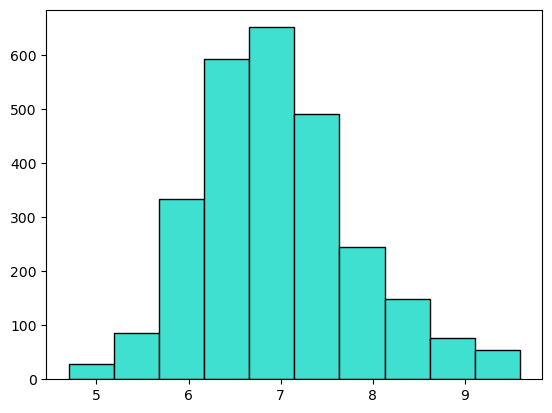

Univariate feature analysis of feature volatile_acidity: 


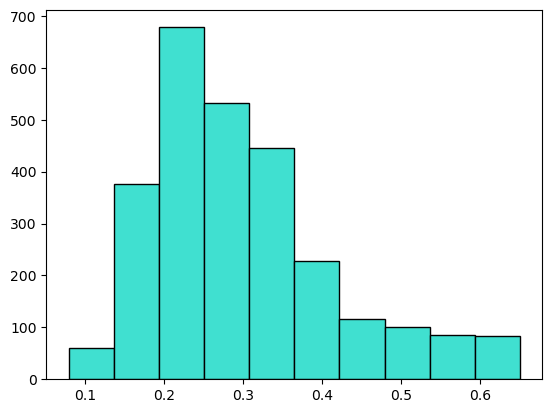

Univariate feature analysis of feature citric_acid: 


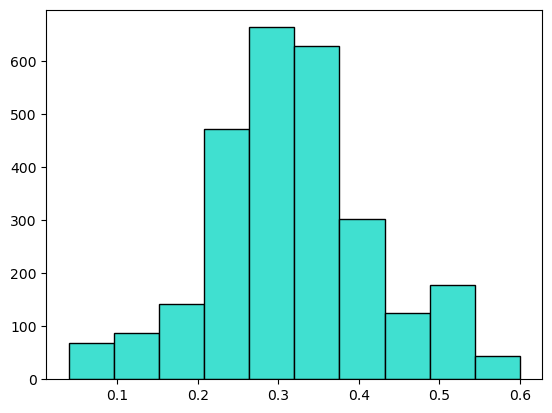

Univariate feature analysis of feature residual_sugar: 


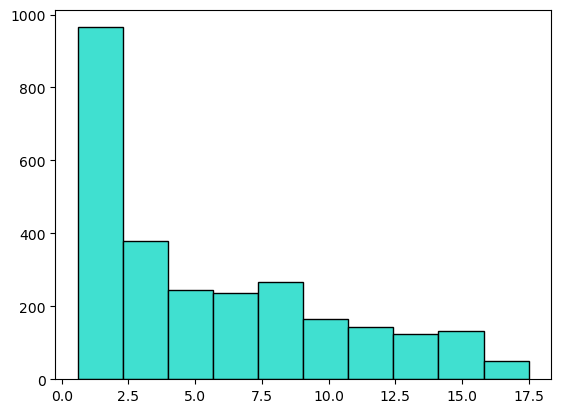

Univariate feature analysis of feature chlorides: 


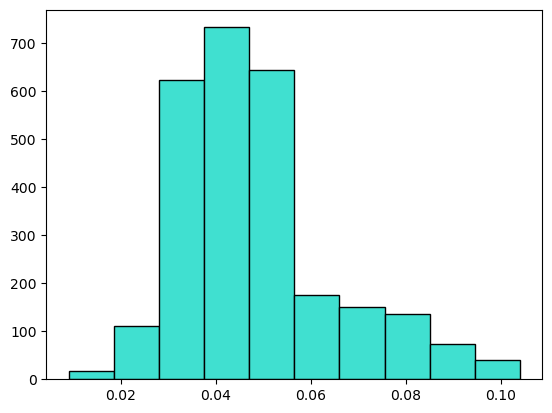

Univariate feature analysis of feature free_sulfur_dioxide: 


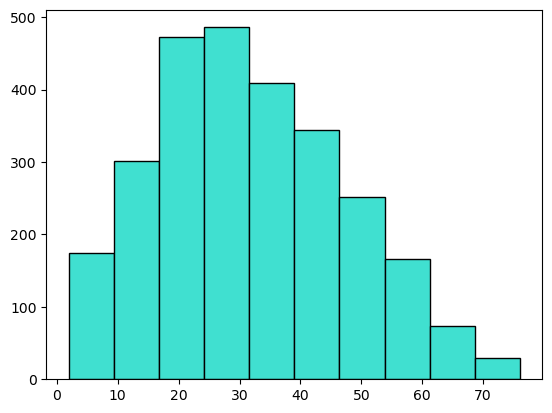

Univariate feature analysis of feature total_sulfur_dioxide: 


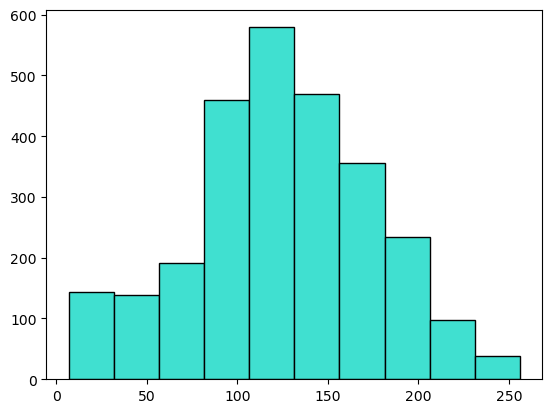

Univariate feature analysis of feature density: 


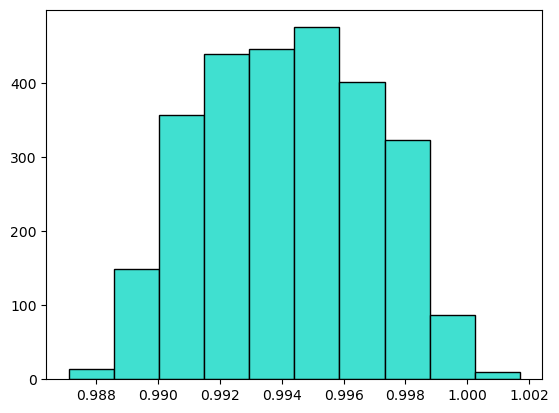

Univariate feature analysis of feature pH: 


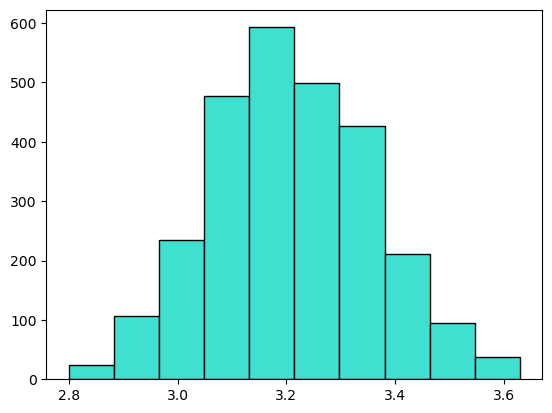

Univariate feature analysis of feature sulphates: 


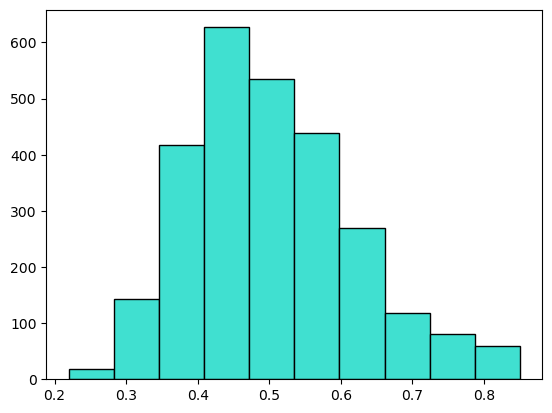

Univariate feature analysis of feature alcohol: 


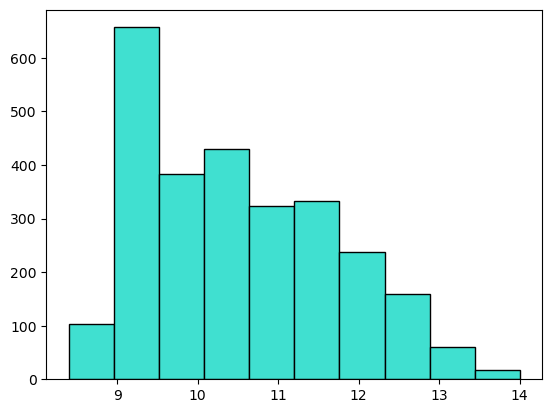

_____________________________________________________
_____________________________________________________

Numeric Columns: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Categorical Columns: ['quality', 'white_wine']
Bivariate assessment of feature white_wine:


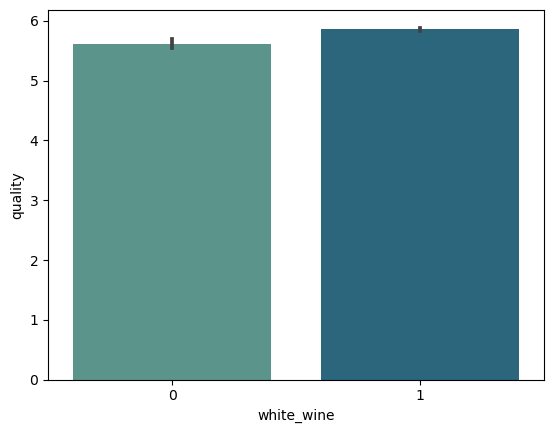

Bivariate feature analysis of feature fixed_acidity: 


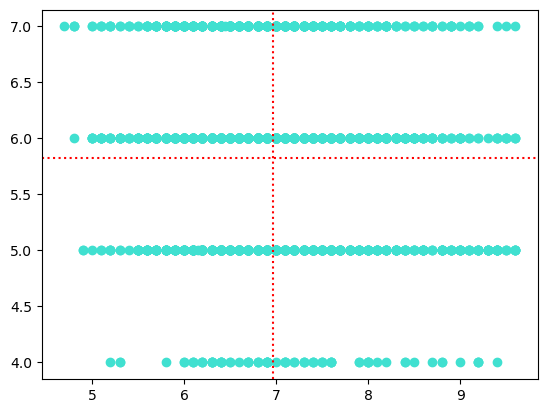

Bivariate feature analysis of feature volatile_acidity: 


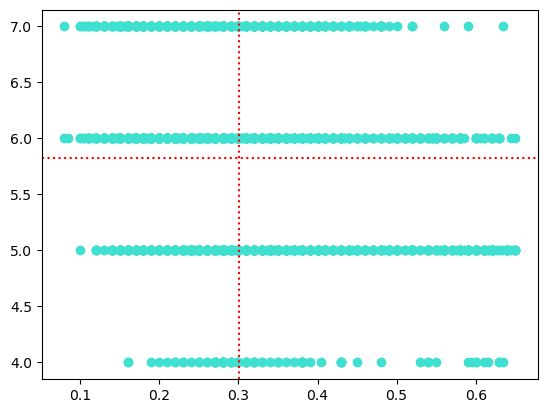

Bivariate feature analysis of feature citric_acid: 


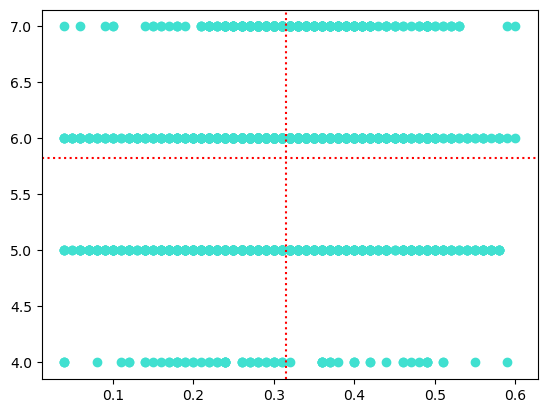

Bivariate feature analysis of feature residual_sugar: 


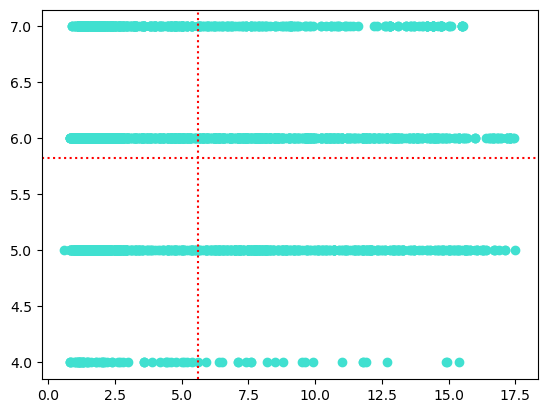

Bivariate feature analysis of feature chlorides: 


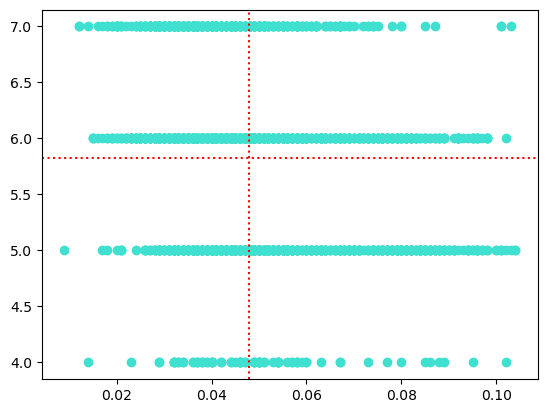

Bivariate feature analysis of feature free_sulfur_dioxide: 


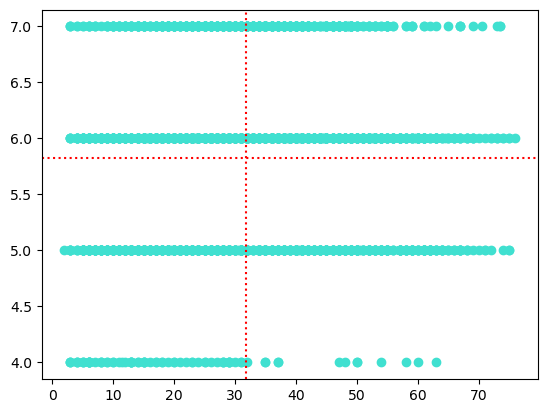

Bivariate feature analysis of feature total_sulfur_dioxide: 


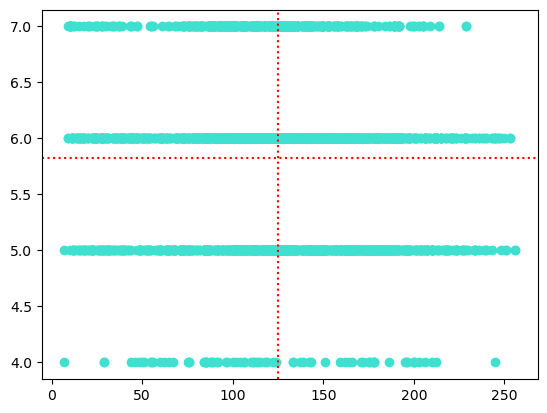

Bivariate feature analysis of feature density: 


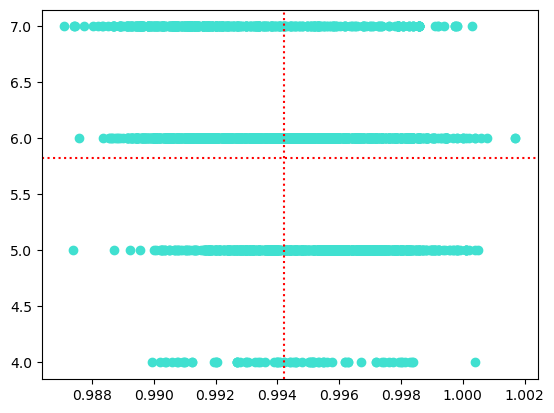

Bivariate feature analysis of feature pH: 


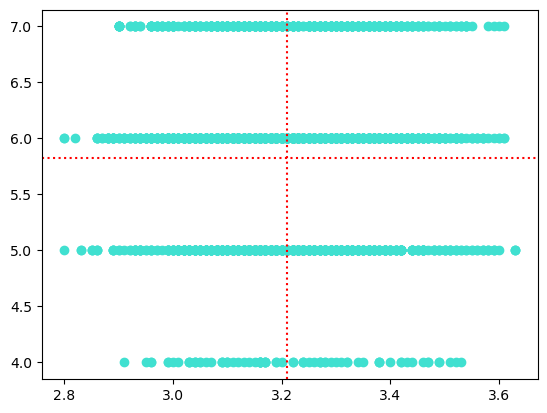

Bivariate feature analysis of feature sulphates: 


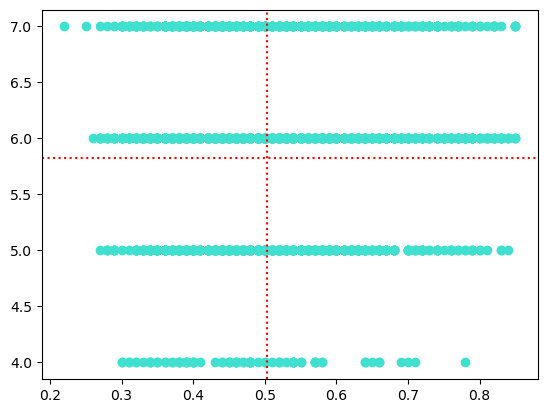

Bivariate feature analysis of feature alcohol: 


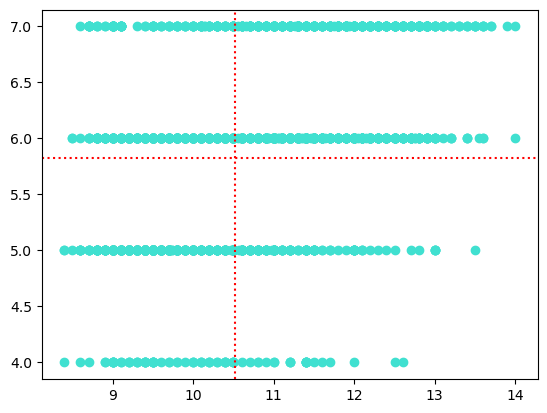

_____________________________________________________
_____________________________________________________



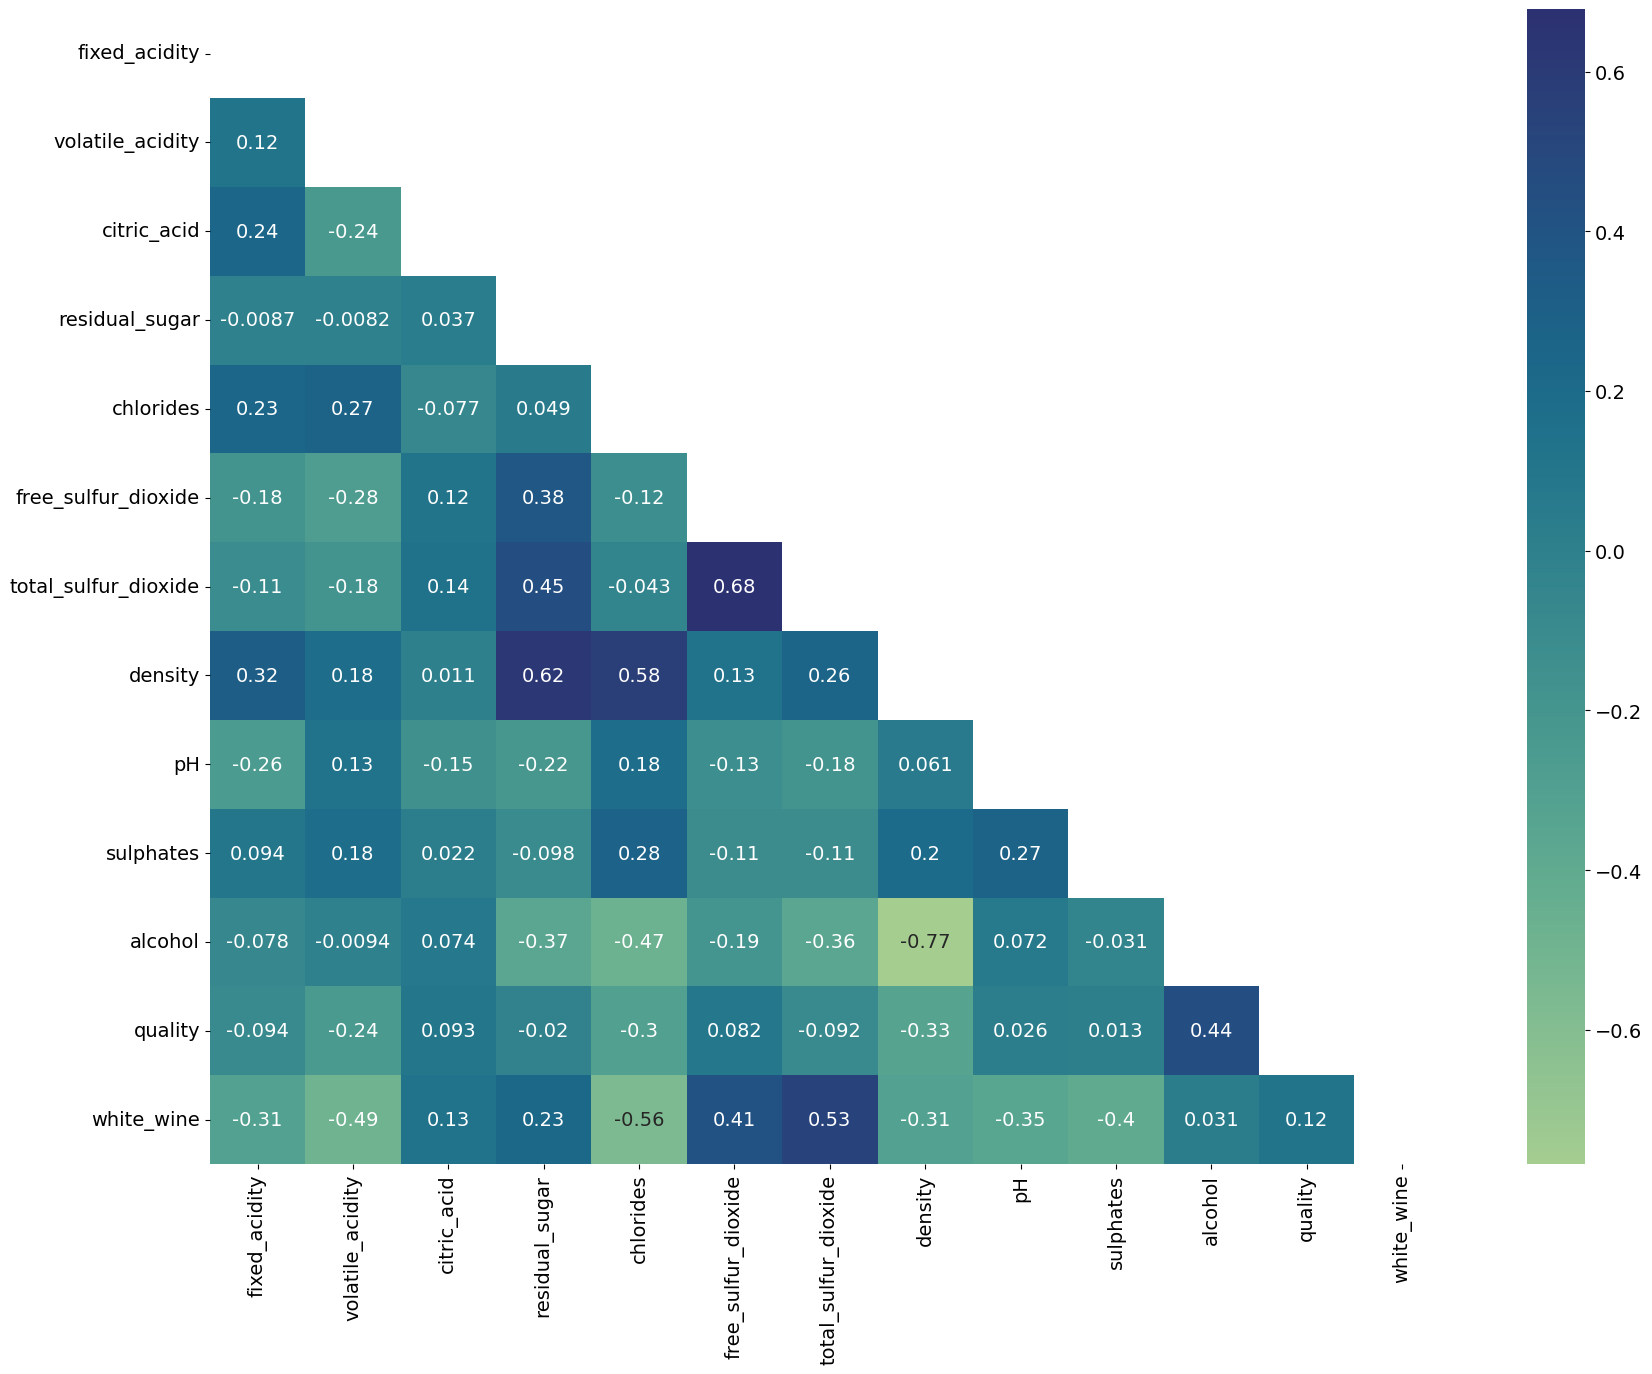

In [20]:
w.viz_explore(train, 'quality')

Univariate Analysis:

- quality on a scale of 4 - 7; not uniformally distributed; most wines have a quality rating of 6
- a lot more white wines than red wines
- fixed acidity:  pH values from 5 - ~ 9 / normal distribution 
- volatile acidity:  skewed to the right, but fairly normal distribution
- citric acid:  normally distributed
- residual sugar:  heavy skewed to the right; large range from 0 o 17.5 with the majority of wines being on the lower end
- chlorides: normal distribution; can contribute to or detract from the overall taste and quality of the wine
- free sulfur dioxide: normally distributed for the most part
- total sulfur dioxide:  pretty normal distribution
- density:  Normal distribution with most wines in the middle range; somewhat uniformly distributed in the middle range
- pH: normally distributed
- sulphates: somewhat skewed to the right; might see the better quality wines with lower levels
- alcohol:  skewed to the right; assume this is the percent alcohol

Bivariate Analysis:

- pretty even distribution of quality between whites and reds
- Fixed acidity vs quality:  the crossover sits at ~ 7 acidity and a quality rating of ~ 6; from quality ratings between 5 and 7, there is a pretty even even distribution of acidities, but in the lower quality, the range tightens between acidity levels between 6 and 8
- volatile acidity vs quality:  seems the highest quality wines have lower volatile acidities and the lowest quality of wines have acidities between .2 and .4
- citric acid vs quality:  Looks like the highest qualities of wine have more concentrated citric acid levels between .2 and .5 whereas the other quality ratings are evenly spread 
- residual sugar vs quality:  interestingly, it looks like both the highest and th lowest qualities of wines have lower levels of residual sugar, whereas the middle range of qualities have a even spread
- chlorides vs quality:  highest quality wines have lower levels and lower qualities have higher levels
- free sulfur dioxide vs quality:  interestingly, it looks like both the highest and th lowest qualities of wines have lower levels, whereas the middle range of qualities have a even spread
-  total sulfur dioxide vs quality:  higher quality wines have lower levels it seems
- density vs quality:  perhaps higher quality wines ahve lower desnities and lower quality wines have densities in the mid to higher range
- pH vs quality:  seems likw higher quality wines have higher pH levelsand lower quality wines have middle pH levels
- sulphates vs quality:  the mean overall sulphate levels is actually on thw lower half of the range, but theres no significant pattern between the different qualities
- alcohol vs quality:  seems like higher quality means more ABV and lower quality have lower ABV 

Heatmap Analysis:

- strongest correlation with quality: 
    - negative linear relationship with density, chlorides, and volatile acidity
    - positive linear relationship with alcohol

Bivariate assessment of feature fixed_acidity:


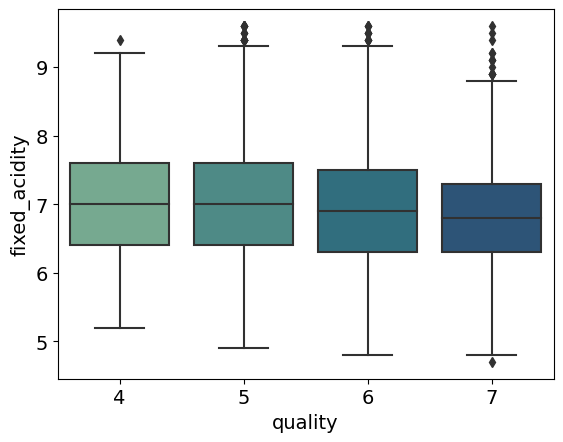

Bivariate assessment of feature volatile_acidity:


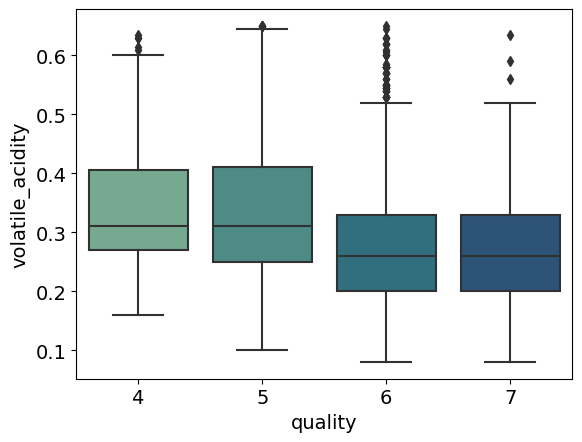

Bivariate assessment of feature citric_acid:


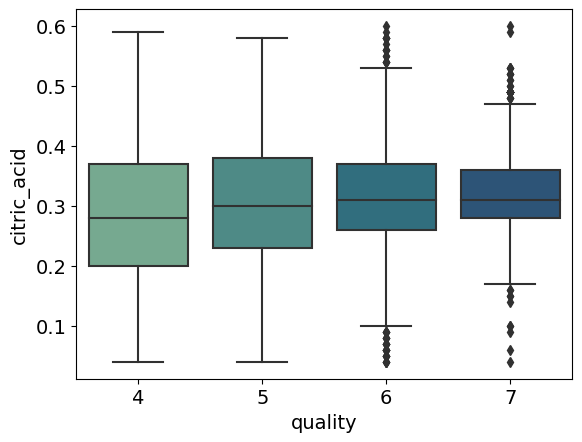

Bivariate assessment of feature residual_sugar:


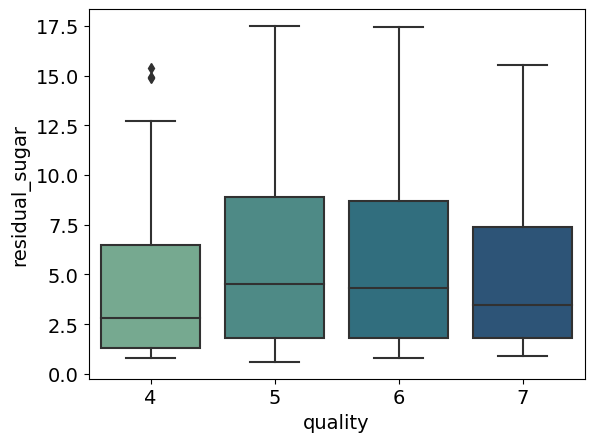

Bivariate assessment of feature chlorides:


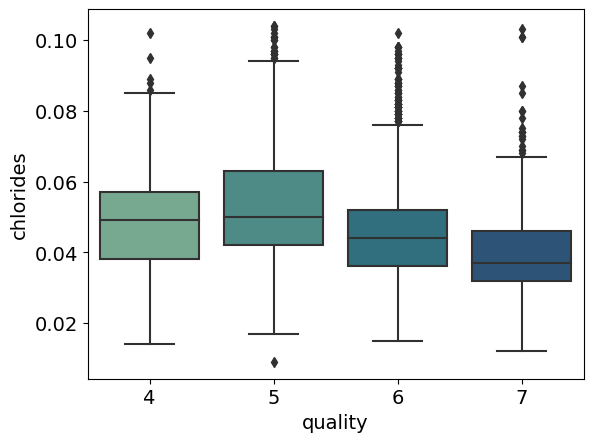

Bivariate assessment of feature free_sulfur_dioxide:


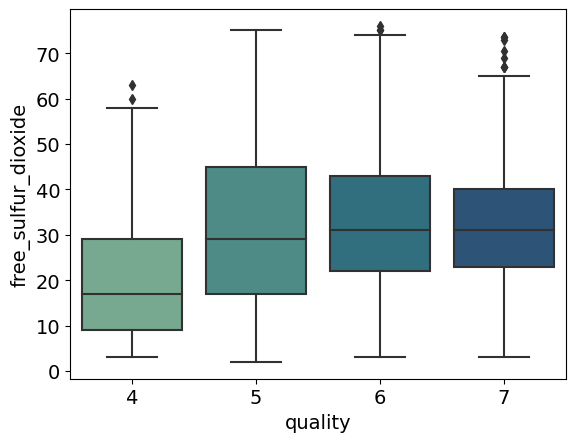

Bivariate assessment of feature total_sulfur_dioxide:


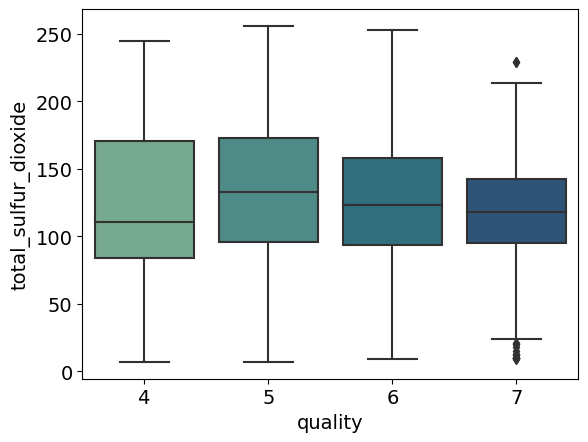

Bivariate assessment of feature density:


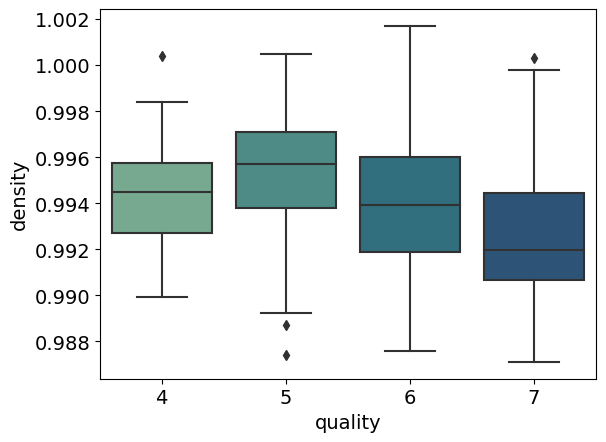

Bivariate assessment of feature pH:


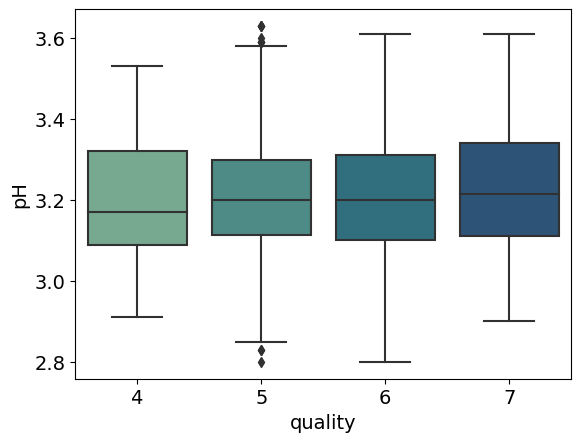

Bivariate assessment of feature sulphates:


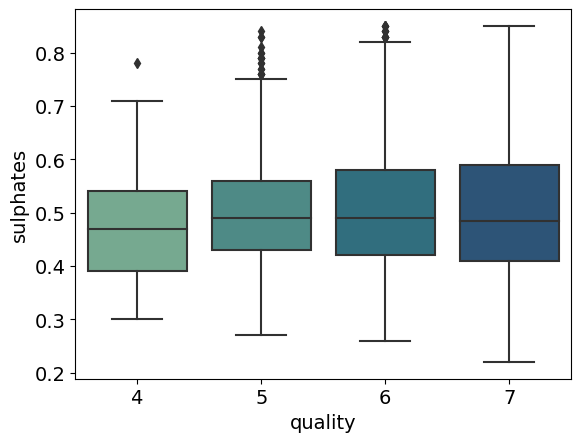

Bivariate assessment of feature alcohol:


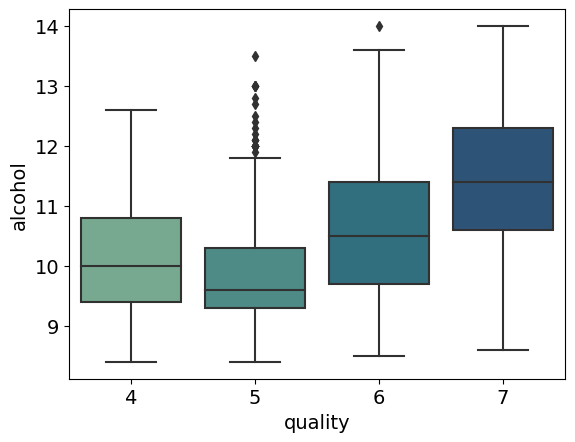

Bivariate assessment of feature white_wine:


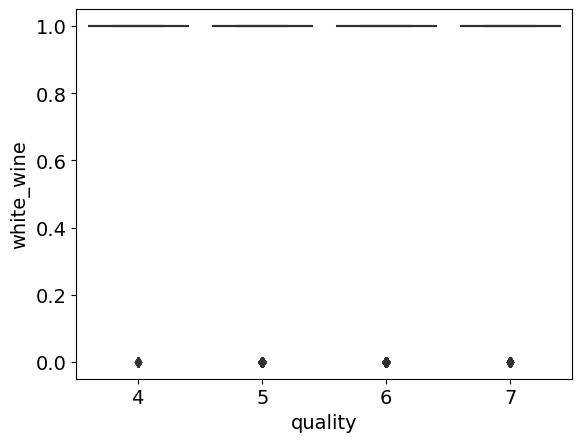

_____________________________________________________
_____________________________________________________



In [21]:
w.boxplot(train)

- Maybe look at why the free sulfur dioxide levels are so low in lowest quality wines? Seems like the higher the levels the higher the quality?

Questions to explore:

    1. test if there is a correlation between chlorides, volatile acidity, and density and quality
    
    2. test if there is a difference in mean quality between reds and whites
    
    3. Conduct anova testing between all means of most correlative feature -- leave this for later

#### Statistical Testing

Density vs Quality

H$_O$:  There is no linear relationship between wine density and quality.

H$_A$:  There is a linear relationship between wine density and quality.

In [22]:
corr, p = stats.pearsonr(train.density, train.quality)

α = 0.05

if p < α:
    print(f'With a p value of {p}, we can must reject the null hypothesis, and can conclude with some confidene that there is a linear relationship between wine density and quality. \n\nThe correlation coefficient is {corr}.')

With a p value of 5.378648057067595e-65, we can must reject the null hypothesis, and can conclude with some confidene that there is a linear relationship between wine density and quality. 

The correlation coefficient is -0.318846720963122.


Chlorides vs Quality

H$_O$:  There is no linear relationship between the level of chlorides in wine and quality.

H$_A$:  There is a linear relationship between the level of chlorides in wine and quality.

In [23]:
corr, p = stats.pearsonr(train.chlorides, train.quality)

α = 0.05

if p < α:
    print(f'With a p value of {p}, we can must reject the null hypothesis, and can conclude with some confidene that there is a linear relationship between the level of chlorides in wine and quality. \n\nThe correlation coefficient is {corr}.')

With a p value of 1.1801060756095295e-46, we can must reject the null hypothesis, and can conclude with some confidene that there is a linear relationship between the level of chlorides in wine and quality. 

The correlation coefficient is -0.27068507841341416.


Volatile Acidity vs Quality

H$_O$:  There is no linear relationship between wine volatile acidity and quality.

H$_A$:  There is a linear relationship between wine volatile acidity and quality.

In [24]:
corr, p = stats.pearsonr(train.volatile_acidity, train.quality)

α = 0.05

if p < α:
    print(f'With a p value of {p}, we can must reject the null hypothesis, and can conclude with some confidene that there is a linear relationship between wine volatile acidity and quality. \n\nThe correlation coefficient is {corr}.')

With a p value of 9.34360517283721e-38, we can must reject the null hypothesis, and can conclude with some confidene that there is a linear relationship between wine volatile acidity and quality. 

The correlation coefficient is -0.24329435656026252.


Alcohol vs Quality

H$_O$:  There is no linear relationship between alcohol content and quality.

H$_A$:  There is a linear relationship between alcohol content and quality.

In [25]:
corr, p = stats.pearsonr(train.alcohol, train.quality)

α = 0.05

if p < α:
    print(f'With a p value of {p}, we can must reject the null hypothesis, and can conclude with some confidene that there is a linear relationship between alcohol content and quality. \n\nThe correlation coefficient is {corr}.')

With a p value of 3.46835007199705e-129, we can must reject the null hypothesis, and can conclude with some confidene that there is a linear relationship between alcohol content and quality. 

The correlation coefficient is 0.4410235108508871.


Means Testing between Red and White Quality

H$_O$:  There is equal variance between the means of quality in red vs white wines. 

H$_A$:  There is unequal variance between the means of quality in red vs white wines. 

In [26]:
whites = train[train['white_wine'] == 1]

In [27]:
reds = train[train['white_wine'] == 0]

In [28]:
t_stat, p = stats.levene(whites.quality, reds.quality)

In [29]:
α = 0.05

if p < α:
    print('we must reject the null hypothsis.')
else: print('We cannot reject the null hypothesis; we can conclude that the samples have equal variance.')

We cannot reject the null hypothesis; we can conclude that the samples have equal variance.


H$_O$:  There is no difference in the quality mean between reds and whites.

H$_A$:  There is a difference in the quality mean between reds and whites. 

In [30]:
t_stat, p = stats.ttest_ind(whites.quality, reds.quality, equal_var=True)

if p < α:
    print(f'With a p value of {p}, we must reject the null hypothesis, and can conclude with some confidence that there is a difference in mean quality of wine between reds and whites')
else: 
    print(f'With a p value of {p}, we fail to reject the null hypothesis, and can conclude with some confidence that there is NO difference in mean quality of wine between reds and whites')

With a p value of 1.491578217164802e-08, we must reject the null hypothesis, and can conclude with some confidence that there is a difference in mean quality of wine between reds and whites


In [31]:
reds.quality.mean()

5.619897959183674

In [32]:
whites.quality.mean()

5.85609334485739

So on average, whites are of higher quality than reds. Lets go back later and try to find out why. It doesn't look like it's that much of a difference though...

In [33]:
import preprocess as p

In [34]:
X_train_scaled, X_validate_scaled, X_test_scaled, X_train, X_validate, X_test, y_train, y_validate, y_test = p.preprocess_clustering_wine()

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'white_wine']
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']


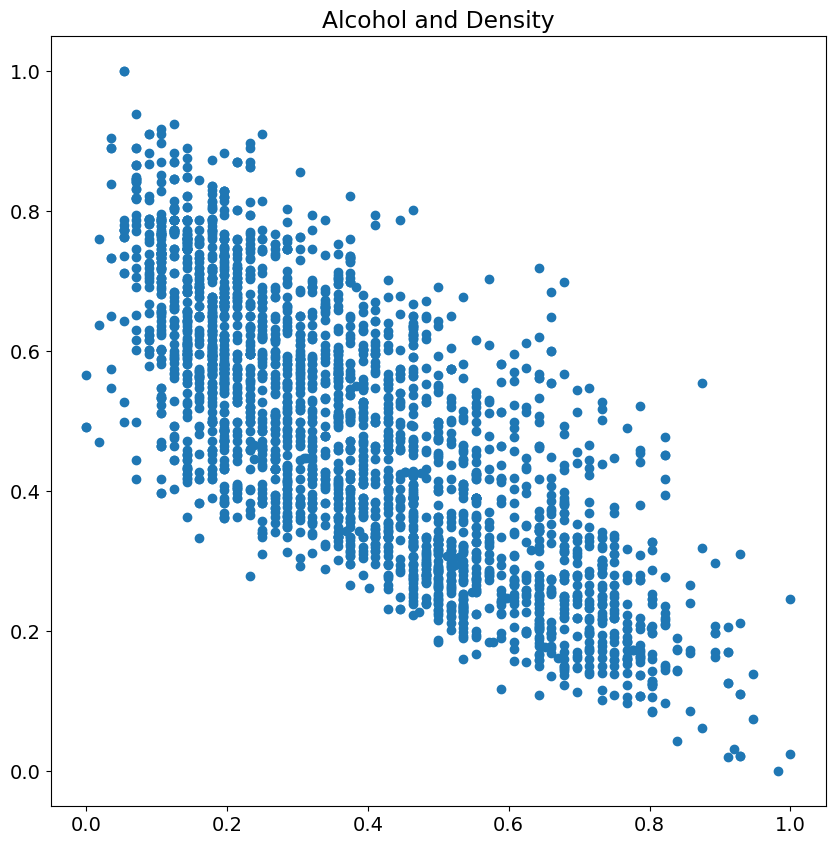

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(X_train_scaled.alcohol, X_train_scaled.density)
plt.title('Alcohol and Density')
plt.show()

In [36]:
# dictionary comprehensions!!!
# theyre convenient, I promise!
{k: KMeans(k).fit(X_train_scaled
                 ).inertia_ for k in range(2,15)}
# alternatively:
my_kmeans_dict = {}
for k in range(1,15):
    my_kmeans_dict[k] = KMeans(k).fit(X_train_scaled).inertia_

In [37]:
my_kmeans_dict

{1: 1178.229763020352,
 2: 904.1286360359677,
 3: 723.3293470807856,
 4: 665.8397912490926,
 5: 628.0056224026152,
 6: 600.7643181641107,
 7: 571.5215271966533,
 8: 545.8765031264054,
 9: 527.1851974370759,
 10: 513.5279670705305,
 11: 500.897391182246,
 12: 490.00447108923345,
 13: 479.66114018950447,
 14: 468.8249265653072}

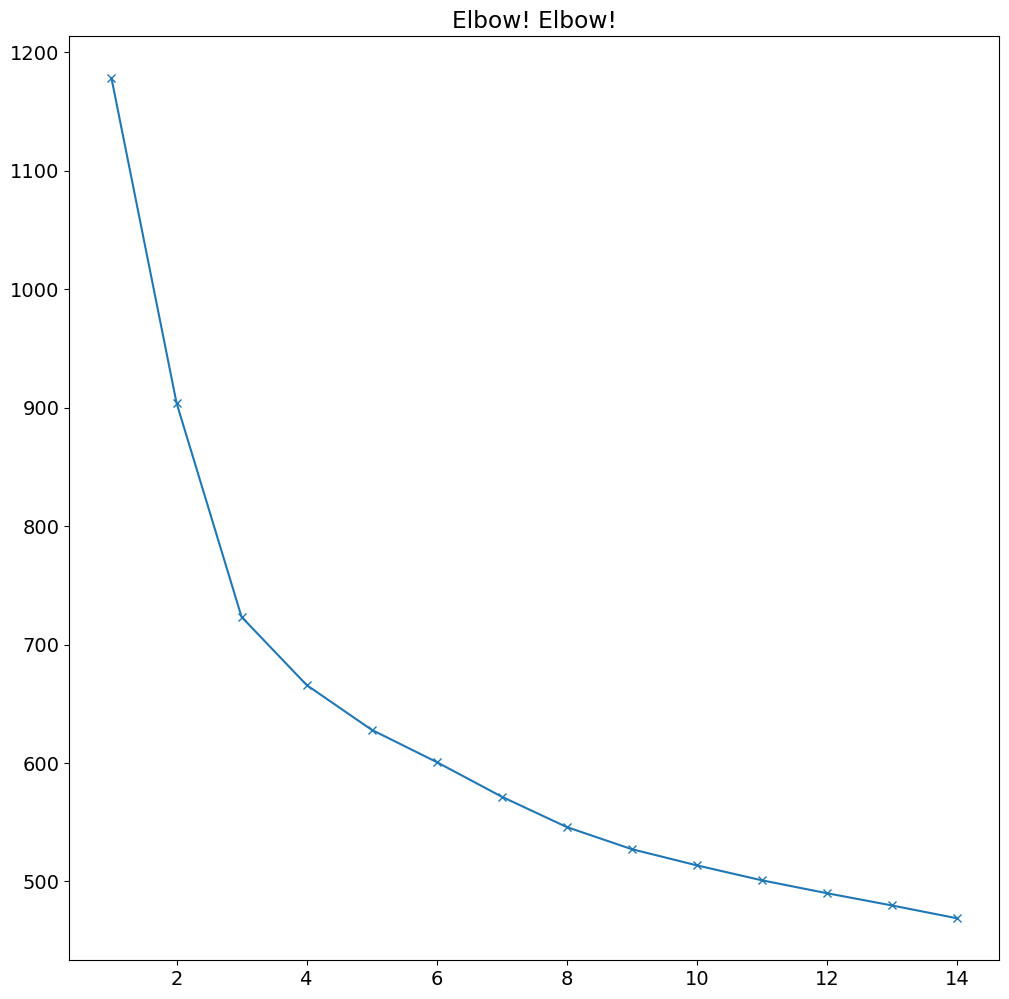

In [38]:
plt.figure(figsize=(12,12))
pd.Series(my_kmeans_dict).plot(marker='x')
plt.title('Elbow! Elbow!')
plt.show()

In [39]:
# we preprocessed! huzzah!
# lets make a clustering object from sklearn
clustering_feats = ['alcohol', 'density', 'chlorides', 'volatile_acidity']
# Make a thing! Thats my favorite!
k_means_prototype = KMeans(n_clusters=4)
# fit the thing!!!!
k_means_prototype.fit(X_train_scaled[clustering_feats])
# use the thing
clusters = k_means_prototype.predict(
    X_train_scaled[clustering_feats])

In [40]:
X_train_scaled['cluster_assigned'] = clusters

In [41]:
X_train_scaled['cluster_assigned'].value_counts()

3    876
1    851
0    564
2    415
Name: cluster_assigned, dtype: int64

In [42]:
X_train_scaled['quality'] = y_train.quality

In [43]:
X_train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,cluster_assigned,quality
2024,0.469388,0.228070,0.428571,0.473373,0.378947,0.472973,0.859438,0.568197,0.542169,0.507937,0.357143,1,6
429,0.897959,0.771930,0.517857,0.041420,0.642105,0.094595,0.092369,0.732694,0.530120,0.603175,0.160714,2,5
4625,0.755102,0.245614,0.464286,0.491124,0.157895,0.202703,0.445783,0.510624,0.228916,0.190476,0.375000,1,6
1092,0.469388,0.807018,0.089286,0.082840,0.757895,0.108108,0.036145,0.526388,0.759036,0.587302,0.553571,2,6
4422,0.591837,0.333333,0.535714,0.260355,0.326316,0.216216,0.196787,0.255655,0.313253,0.412698,0.714286,0,6


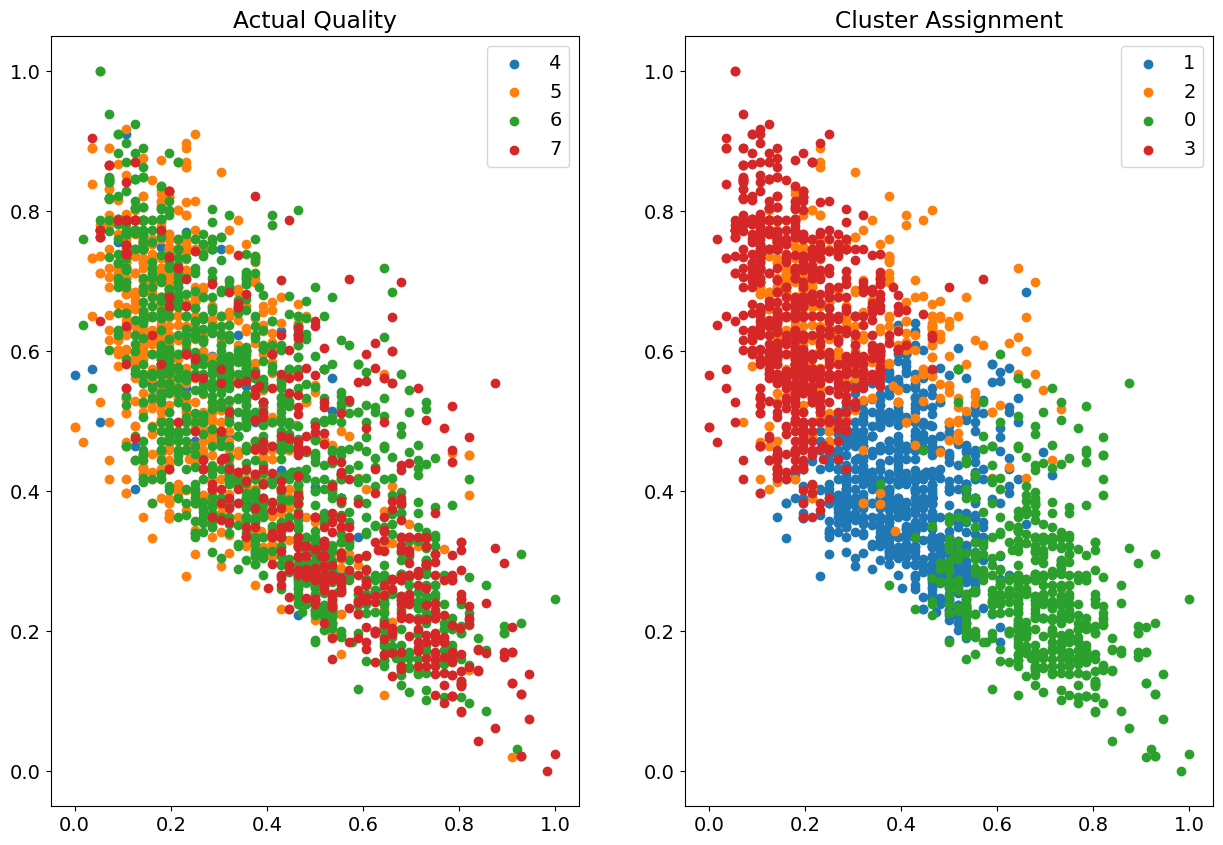

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

for quality, subset in X_train_scaled.groupby('quality'):
    axs[0].scatter(subset.alcohol,
                   subset.density,
                   label=quality)
axs[0].legend()
axs[0].set(title='Actual Quality')

for cluster in X_train_scaled.cluster_assigned.unique():
    axs[1].scatter(X_train_scaled[X_train_scaled.cluster_assigned == cluster].alcohol,
             X_train_scaled[X_train_scaled.cluster_assigned == cluster].density,
               label=cluster)
axs[1].legend()
axs[1].set(title='Cluster Assignment')

plt.show()

Linear regression, RF, decision tree, KNN, logistic regression - caroline with clusters

#### Modeling

Baseline

In [45]:
X_train_scaled.quality.value_counts()

6    1265
5     846
7     518
4      77
Name: quality, dtype: int64

In [46]:
y_train['baseline'] = 6

In [47]:
X_train_scaled = X_train_scaled.drop(columns={'quality'})
X_test_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
5520,0.551020,0.298246,0.589286,0.118343,0.431579,0.297297,0.502008,0.292666,0.289157,0.492063,0.500000
5845,0.204082,0.175439,0.392857,0.094675,0.147368,0.256757,0.353414,0.150103,0.325301,0.507937,0.696429
2195,0.346939,0.692982,0.035714,0.023669,0.221053,0.094595,0.497992,0.225497,0.204819,0.111111,0.428571
4022,0.306122,0.631579,0.250000,0.420118,0.915789,0.351351,0.815261,0.726525,0.915663,0.793651,0.142857
4595,0.061224,0.333333,0.500000,0.230769,0.242105,0.756757,0.686747,0.167923,0.783133,0.142857,0.750000


In [48]:
X_train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,cluster_assigned
2024,0.469388,0.228070,0.428571,0.473373,0.378947,0.472973,0.859438,0.568197,0.542169,0.507937,0.357143,1
429,0.897959,0.771930,0.517857,0.041420,0.642105,0.094595,0.092369,0.732694,0.530120,0.603175,0.160714,2
4625,0.755102,0.245614,0.464286,0.491124,0.157895,0.202703,0.445783,0.510624,0.228916,0.190476,0.375000,1
1092,0.469388,0.807018,0.089286,0.082840,0.757895,0.108108,0.036145,0.526388,0.759036,0.587302,0.553571,2
4422,0.591837,0.333333,0.535714,0.260355,0.326316,0.216216,0.196787,0.255655,0.313253,0.412698,0.714286,0


In [49]:
# we preprocessed! huzzah!
# lets make a clustering object from sklearn
clustering_feats = ['alcohol', 'density', 'chlorides', 'volatile_acidity']
# Make a thing! Thats my favorite!
k_means_prototype = KMeans(n_clusters=4)
# fit the thing!!!!
k_means_prototype.fit(X_train_scaled[clustering_feats])
# use the thing
val_clusters = k_means_prototype.predict(
    X_validate_scaled[clustering_feats])

# we preprocessed! huzzah!
# lets make a clustering object from sklearn
clustering_feats = ['alcohol', 'density', 'chlorides', 'volatile_acidity']
# Make a thing! Thats my favorite!
k_means_prototype = KMeans(n_clusters=4)
# fit the thing!!!!
k_means_prototype.fit(X_train_scaled[clustering_feats])
# use the thing
test_clusters = k_means_prototype.predict(
    X_test_scaled[clustering_feats])

X_validate_scaled['cluster_assigned'] = val_clusters

X_test_scaled['cluster_assigned'] = test_clusters

In [50]:
e.class_report(y_train.quality, y_train.baseline)

,4,5,6,7,accuracy,macro avg,weighted avg
precision,0.0,0.0,0.467480,0.0,0.46748,0.11687,0.218537
recall,0.0,0.0,1.000000,0.0,0.46748,0.25000,0.467480
f1-score,0.0,0.0,0.637119,0.0,0.46748,0.15928,0.297840
support,77.0,846.0,1265.000000,518.0,0.46748,2706.00000,2706.000000


In [97]:
y_validate['baseline'] = 6

e.class_report(y_validate.quality, y_validate.baseline)

,4,5,6,7,accuracy,macro avg,weighted avg
precision,0.0,0.0,0.467425,0.0,0.467425,0.116856,0.218486
recall,0.0,0.0,1.000000,0.0,0.467425,0.250000,0.467425
f1-score,0.0,0.0,0.637068,0.0,0.467425,0.159267,0.297782
support,27.0,303.0,452.000000,185.0,0.467425,967.000000,967.000000


Decision Tree

In [51]:
# lets add a max depth 

model_dict = {}
model = {}

for i in range(2, 15):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train_scaled, y_train['quality'])
    model_dict[f'dt_depth_{i}'] = {}
    model_dict[f'dt_depth_{i}']['model'] = clf
    model_dict[f'dt_depth_{i}']['train_score'] = \
    clf.score(X_train_scaled, y_train['quality'])
    model_dict[f'dt_depth_{i}']['validate_score'] = \
    clf.score(X_validate_scaled, y_validate)
    model_dict[f'dt_depth_{i}']['val_diff'] = \
    clf.score(X_train_scaled, y_train['quality']) - clf.score(X_validate_scaled, y_validate)

In [84]:
model_dict

{'knn_neighbors_2': {'model': KNeighborsClassifier(n_neighbors=2),
  'train_score': 0.8170731707317073,
  'validate_score': 0.3578076525336091,
  'val_diff': 0.4592655181980982},
 'knn_neighbors_3': {'model': KNeighborsClassifier(n_neighbors=3),
  'train_score': 0.7827050997782705,
  'validate_score': 0.3940020682523268,
  'val_diff': 0.3887030315259437},
 'knn_neighbors_4': {'model': KNeighborsClassifier(n_neighbors=4),
  'train_score': 0.7324464153732446,
  'validate_score': 0.41985522233712513,
  'val_diff': 0.3125911930361195},
 'knn_neighbors_5': {'model': KNeighborsClassifier(),
  'train_score': 0.7202512934220251,
  'validate_score': 0.41778697001034126,
  'val_diff': 0.30246432341168383},
 'knn_neighbors_6': {'model': KNeighborsClassifier(n_neighbors=6),
  'train_score': 0.6932742054693274,
  'validate_score': 0.42605997931747674,
  'val_diff': 0.26721422615185064},
 'knn_neighbors_7': {'model': KNeighborsClassifier(n_neighbors=7),
  'train_score': 0.6847745750184775,
  'valida

In [53]:
# Best DT is max_depth = 12

In [95]:
class_model_dict = {
    'DecisionTreeClassifier(max_depth=12)':
    {
        'train_score': round(0.905395, 3),
        'validate_score': round(0.595657, 3), 
        'difference': round(0.309739, 3)
    
    },
    'RandomForestClassifier(max_depth=8, min_samples_leaf=3)':
    {
        
        'train_score': round(0.74834, 3),
        'validate_score': round(0.58738, 3), 
        'difference': round(0.16096, 3)
    },
    'Logistic Regression':
    {
        'train_score': round(0.5698447893569845, 3),
        'validate_score': round(0.5491209927611168, 3),
        'difference': round((0.5698447893569845 - 0.5491209927611168), 3)
        
    },
    'KNeighborsClassifier(n_neighbors=6)':
    {
        'train_score': 0.693,
        'validate_score': 0.426,
        'difference': 0.267
    }
}

{'DecisionTreeClassifier(max_depth=12)': {'train_score': 0.905,
  'validate_score': 0.596,
  'difference': 0.31},
 'RandomForestClassifier(max_depth=8, min_samples_leaf=3)': {'train_score': 0.748,
  'validate_score': 0.587,
  'difference': 0.161},
 'Logistic Regression': {'train_score': 0.57,
  'validate_score': 0.549,
  'difference': 0.021},
 'KNeighborsClassifier(n_neighbors=6)': {'train_score': 0.693,
  'validate_score': 0.426,
  'difference': 0.267}}

Random Forest

In [55]:
# Make the things 

rf_models = {}

for i in [pair for pair in zip (range(1, 10), range(10, 1, -1))]:
    # make the things
    clf = RandomForestClassifier(min_samples_leaf=i[0],
                                max_depth=i[1])
    # fit the things
    clf.fit(X_train_scaled, y_train['quality'])
    #Before we can use the things, we have to name and store the things 
    #to be able to call them
    rf_models[f'{clf}{i}_model'] = {
        'model': clf,
        'train_score': round(clf.score(X_train_scaled, y_train['quality']), 5),
        'validate_score': round(clf.score(X_validate_scaled, y_validate), 5),
        'val_diff': round(clf.score(X_train_scaled, y_train['quality']), 5) - round(clf.score(X_validate_scaled, y_validate), 5)
    
    }

In [56]:
pd.DataFrame(rf_models).T

,model,train_score,validate_score,val_diff
"RandomForestClassifier(max_depth=10)(1, 10)_model","(DecisionTreeClassifier(max_depth=10, max_feat...",0.88987,0.63392,0.25595
"RandomForestClassifier(max_depth=9, min_samples_leaf=2)(2, 9)_model","(DecisionTreeClassifier(max_depth=9, max_featu...",0.80746,0.61634,0.19112
"RandomForestClassifier(max_depth=8, min_samples_leaf=3)(3, 8)_model","(DecisionTreeClassifier(max_depth=8, max_featu...",0.74834,0.58738,0.16096
"RandomForestClassifier(max_depth=7, min_samples_leaf=4)(4, 7)_model","(DecisionTreeClassifier(max_depth=7, max_featu...",0.7088,0.59876,0.11004
"RandomForestClassifier(max_depth=6, min_samples_leaf=5)(5, 6)_model","(DecisionTreeClassifier(max_depth=6, max_featu...",0.66223,0.57187,0.09036
"RandomForestClassifier(max_depth=5, min_samples_leaf=6)(6, 5)_model","(DecisionTreeClassifier(max_depth=5, max_featu...",0.63821,0.5605,0.07771
"RandomForestClassifier(max_depth=4, min_samples_leaf=7)(7, 4)_model","(DecisionTreeClassifier(max_depth=4, max_featu...",0.60569,0.55429,0.0514
"RandomForestClassifier(max_depth=3, min_samples_leaf=8)(8, 3)_model","(DecisionTreeClassifier(max_depth=3, max_featu...",0.58093,0.51396,0.06697
"RandomForestClassifier(max_depth=2, min_samples_leaf=9)(9, 2)_model","(DecisionTreeClassifier(max_depth=2, max_featu...",0.56393,0.49535,0.06858


In [57]:
# Best RF max_depth = 8, min_samples_leaf = 3

# OR maybe 

# Best RF max_depth = 10, min_samples_leaf = 1, but maybe overfit....

Logistic Regression

In [58]:
# make the thing
lr1 = LogisticRegression()

# fit the thing
lr1.fit(X_train_scaled, y_train['quality'])

# use the thing
lr1_train_score = lr1.score(X_train_scaled, y_train['quality'])

lr1_val_score = lr1.score(X_validate_scaled, y_validate)

print(lr1_train_score)
print(lr1_val_score)

0.5698447893569845
0.5491209927611168


KNN

In [59]:
model_dict = {}
model = {}

for i in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train['quality'])
    model_dict[f'knn_neighbors_{i}'] = {}
    model_dict[f'knn_neighbors_{i}']['model'] = knn
    model_dict[f'knn_neighbors_{i}']['train_score'] = \
    knn.score(X_train_scaled, y_train['quality'])
    model_dict[f'knn_neighbors_{i}']['validate_score'] = \
    knn.score(X_validate_scaled, y_validate)
    model_dict[f'knn_neighbors_{i}']['val_diff'] = \
    knn.score(X_train_scaled, y_train['quality']) - knn.score(X_validate_scaled, y_validate)

In [60]:
pd.DataFrame(model_dict).T

,model,train_score,validate_score,val_diff
knn_neighbors_2,KNeighborsClassifier(n_neighbors=2),0.817073,0.357808,0.459266
knn_neighbors_3,KNeighborsClassifier(n_neighbors=3),0.782705,0.394002,0.388703
knn_neighbors_4,KNeighborsClassifier(n_neighbors=4),0.732446,0.419855,0.312591
knn_neighbors_5,KNeighborsClassifier(),0.720251,0.417787,0.302464
knn_neighbors_6,KNeighborsClassifier(n_neighbors=6),0.693274,0.42606,0.267214
knn_neighbors_7,KNeighborsClassifier(n_neighbors=7),0.684775,0.422958,0.261817
knn_neighbors_8,KNeighborsClassifier(n_neighbors=8),0.67221,0.421923,0.250286
knn_neighbors_9,KNeighborsClassifier(n_neighbors=9),0.66371,0.423992,0.239719


In [61]:
# Wow these did horribly...

#### Linear Regression

Baseline

In [62]:
# To create the baseline model, we will calculate the mean and median of the target variable Series
# and then calculate the RMSE of the train and validate datasets to see which has the least area of error

quality_pred_median = y_train.quality.median()
y_train['quality_pred_median'] = quality_pred_median
y_validate['quality_pred_median'] = quality_pred_median

quality_pred_mean = y_train.quality.mean()
quality_pred_mean = round(quality_pred_mean, 0)
y_train['quality_pred_mean'] = quality_pred_mean
y_validate['quality_pred_mean'] = quality_pred_mean

rmse_train_mu = mean_squared_error(y_train.quality,
                                y_train.quality_pred_mean) ** .5

rmse_validate_mu = mean_squared_error(y_validate.quality, y_validate.quality_pred_mean) ** (0.5)

print(quality_pred_mean)
print(quality_pred_median)

print(f"""RMSE using Mean\nTrain/In-Sample: {round(rmse_train_mu, 2)} 
      Validate/Out-of-Sample: {round(rmse_validate_mu, 2)}""")

rmse_train_med = mean_squared_error(y_train.quality, y_train.quality_pred_median) ** .5
rmse_validate_med = mean_squared_error(y_validate.quality, y_validate.quality_pred_median) ** (0.5)

print(f"""RMSE using Median\nTrain/In-Sample: {round(rmse_train_med, 2)} 
      Validate/Out-of-Sample: {round(rmse_validate_med, 2)}""")

6.0
6.0
RMSE using Mean
Train/In-Sample: 0.79 
      Validate/Out-of-Sample: 0.79
RMSE using Median
Train/In-Sample: 0.79 
      Validate/Out-of-Sample: 0.79


In [63]:
# Initializing the dataframe which will hold our model evaluation metrics

metric_df = pd.DataFrame(data=[
    {
        'model': 'mean_baseline',
        'RMSE_train': rmse_train_mu,
        'RMSE_validate': rmse_validate_mu,
        'R2_validate': explained_variance_score(y_validate.quality, y_validate.quality_pred_mean)
    }
]
)

metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,0.786057,0.785073,0.0


Linear Regression: Creating and Evaluating the Model

In [64]:
# MAKE THE THING: create the model object
lm = LinearRegression()

#1. FIT THE THING: fit the model to training data
OLSmodel = lm.fit(X_train_scaled, y_train.quality)

#2. USE THE THING: make a prediction
y_train['quality_pred_lm'] = lm.predict(X_train_scaled)
y_train['quality_pred_lm'] = y_train.quality_pred_lm.round().astype(int)


#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_lm)**.5

# predict validate
y_validate['quality_pred_lm'] = lm.predict(X_validate_scaled)
y_validate['quality_pred_lm'] = y_validate.quality_pred_lm.round().astype(int)

# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_lm)**.5

print(f"""RMSE for OLS using LinearRegression
Training/In-Sample:  {rmse_train} 
Validation/Out-of-Sample: {rmse_validate}""")

metric_df = metric_df.append(
    {
        'model': 'OLS_Regressor',
        'RMSE_train': rmse_train,
        'RMSE_validate': rmse_validate,
        'R2_validate': explained_variance_score(y_validate.quality, 
                                                y_validate.quality_pred_lm)
    }, ignore_index=True

)

metric_df

RMSE for OLS using LinearRegression
Training/In-Sample:  0.7073680436307799 
Validation/Out-of-Sample: 0.7233725448731922


,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,0.786057,0.785073,0.000000
1,OLS_Regressor,0.707368,0.723373,0.107995


LassoLars: Creating and Evaluating the Model

In [65]:
y_train.head()

,quality,baseline,quality_pred_median,quality_pred_mean,quality_pred_lm
2024,6,6,6.0,6.0,6
429,5,6,6.0,6.0,5
4625,6,6,6.0,6.0,6
1092,6,6,6.0,6.0,6
4422,6,6,6.0,6.0,6


In [66]:
# MAKE THE THING: create the model object
lars = LassoLars(alpha=1)

#1. FIT THE THING: fit the model to training data
# We must specify the column in y_train, since we have converted it to a dataframe from a series!
lars.fit(X_train_scaled, y_train.quality)

#2. USE THE THING: make a prediction
y_train['quality_pred_lars'] = lars.predict(X_train_scaled)
y_train['quality_pred_lars'] = y_train.quality_pred_lars.round().astype(int)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_lars) ** .5

#4. REPEAT STEPS 2-3

# predict validate
y_validate['quality_pred_lars'] = lars.predict(X_validate_scaled)
y_validate['quality_pred_lars'] = y_validate.quality_pred_lars.round().astype(int)

# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_lars) ** .5

print(f"""RMSE for Lasso + Lars
_____________________
Training/In-Sample: {rmse_train}, 
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}""")

metric_df = metric_df.append(
    {
        'model': 'lasso_alpha1',
        'RMSE_train': rmse_train,
        'RMSE_validate': rmse_validate,
        'R2_validate': explained_variance_score(y_validate.quality, 
                                                y_validate.quality_pred_lars)
    }, ignore_index=True

)
metric_df

RMSE for Lasso + Lars
_____________________
Training/In-Sample: 0.7860573635949152, 
Validation/Out-of-Sample:  0.7850727312686339
Difference:  -0.0009846323262813206


,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,0.786057,0.785073,0.000000
1,OLS_Regressor,0.707368,0.723373,0.107995
2,lasso_alpha1,0.786057,0.785073,0.000000


TweedieRegressor (GLM:Generalized Linear Model): Creating and Evaluating the Model

In [67]:
# MAKE THE THING: create the model object
glm = TweedieRegressor(power=1, alpha=0)

#1. FIT THE THING: fit the model to training data
# We must specify the column in y_train, since we have converted it to a dataframe from a series!
glm.fit(X_train_scaled, y_train.quality)

#2. USE THE THING: make a prediction
y_train['quality_pred_glm'] = glm.predict(X_train_scaled)
y_train['quality_pred_glm'] = y_train.quality_pred_glm.round().astype(int)

#3. Evaluate: RMSE
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_glm)**(1/2)

#4. REPEAT STEPS 2-3

# predict validate
y_validate['quality_pred_glm'] = glm.predict(X_validate_scaled)
y_validate['quality_pred_glm'] = y_validate.quality_pred_glm.round().astype(int)

# evaluate: RMSE
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_glm)**(1/2)

print(f"""RMSE for GLM using Tweedie, power=1 & alpha=0
_____________________
Training/In-Sample: {rmse_train}, 
Validation/Out-of-Sample:  {rmse_validate}
Difference:  {rmse_validate - rmse_train}""")

#Append
metric_df = metric_df.append(
    {
        'model': 'glm_gamma',
        'RMSE_train': rmse_train,
        'RMSE_validate': rmse_validate,
        'R2_validate': explained_variance_score(y_validate.quality, 
                                                y_validate.quality_pred_glm)
    }, ignore_index=True

)


RMSE for GLM using Tweedie, power=1 & alpha=0
_____________________
Training/In-Sample: 0.7076292096148052, 
Validation/Out-of-Sample:  0.7240869870669617
Difference:  0.016457777452156486


In [68]:
metric_df

,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,0.786057,0.785073,0.000000
1,OLS_Regressor,0.707368,0.723373,0.107995
2,lasso_alpha1,0.786057,0.785073,0.000000
3,glm_gamma,0.707629,0.724087,0.106082


Polynomial Regression: Creating and Evaluating the Model

In [69]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)

# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.quality)

# predict train
y_train['quality_pred_lm2'] = lm2.predict(X_train_degree2)
y_train['quality_pred_lm2'] = y_train.quality_pred_lm2.round().astype(int)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.quality, y_train.quality_pred_lm2)**(1/2)

# predict validate
y_validate['quality_pred_lm2'] = lm2.predict(X_validate_degree2)
y_validate['quality_pred_lm2'] = y_validate.quality_pred_lm2.round().astype(int)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.quality, y_validate.quality_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

#Append
metric_df = metric_df.append(
    {
        'model': 'quadratic',
        'RMSE_train': rmse_train,
        'RMSE_validate': rmse_validate,
        'R2_validate': explained_variance_score(y_validate.quality, 
                                                y_validate.quality_pred_lm2)
    }, ignore_index=True

)
metric_df

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.6793871417653977 
Validation/Out-of-Sample:  0.7147435377221786


,model,RMSE_train,RMSE_validate,R2_validate
0,mean_baseline,0.786057,0.785073,0.000000
1,OLS_Regressor,0.707368,0.723373,0.107995
2,lasso_alpha1,0.786057,0.785073,0.000000
3,glm_gamma,0.707629,0.724087,0.106082
4,quadratic,0.679387,0.714744,0.127529


Modeling Takeways:

For a target with only 4 values, the Linear Regression models did noticably better than the classification models. 

In [70]:
y_train.quality_pred_lars.value_counts()

6    2706
Name: quality_pred_lars, dtype: int64

In [71]:
y_train.head()

,quality,baseline,quality_pred_median,quality_pred_mean,quality_pred_lm,quality_pred_lars,quality_pred_glm,quality_pred_lm2
2024,6,6,6.0,6.0,6,6,6,6
429,5,6,6.0,6.0,5,6,5,5
4625,6,6,6.0,6.0,6,6,6,6
1092,6,6,6.0,6.0,6,6,6,6
4422,6,6,6.0,6.0,6,6,7,6


In [72]:
y_train.quality.value_counts()

6    1265
5     846
7     518
4      77
Name: quality, dtype: int64

In [73]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,white_wine
2024,7.0,0.21,0.28,8.6,0.045,37.0,221.0,0.99540,3.25,0.54,10.4,6,1
429,9.1,0.52,0.33,1.3,0.070,9.0,30.0,0.99780,3.24,0.60,9.3,5,0
4625,8.4,0.22,0.30,8.9,0.024,17.0,118.0,0.99456,2.99,0.34,10.5,6,1
1092,7.0,0.54,0.09,2.0,0.081,10.0,16.0,0.99479,3.43,0.59,11.5,6,0
4422,7.6,0.27,0.34,5.0,0.040,18.0,56.0,0.99084,3.06,0.48,12.4,6,1


In [74]:
def quality_dis():
    
    train, validate, test, train_scaled, validate_scaled, test_scaled = w.wrangle_wine()


    sns.countplot(data=train, x='quality', color='turquoise', edgecolor='black', hue='white_wine')
    plt.title('Distribution of Wine Quality')
    plt.xlabel('Wine Qualities')
    plt.ylabel('Wine Count')

    plt.show()

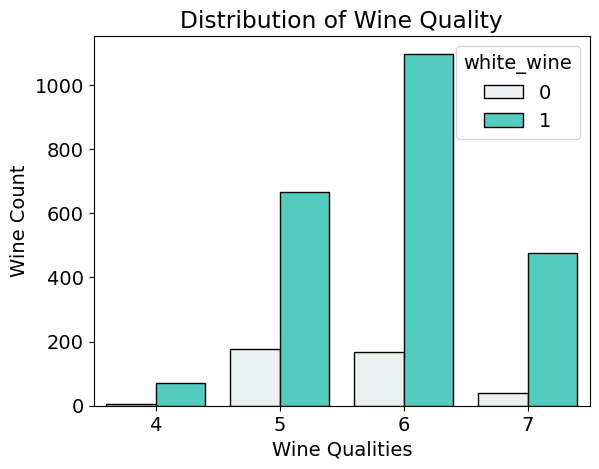

In [75]:
quality_dis()

In [76]:
def quality_dis():
    colors = ['darkred', 'khaki']
    sns.set_palette(sns.color_palette(colors))
    sns.histplot(train, x='quality', hue='white_wine', multiple='stack', bins=4, discrete=True)
    plt.legend(labels = ['White Wines','Red Wines'])
    plt.title('Distribution of Wine Quality')
    plt.xlabel('Wine Qualities')
    plt.ylabel('Wine Count')
    plt.show()

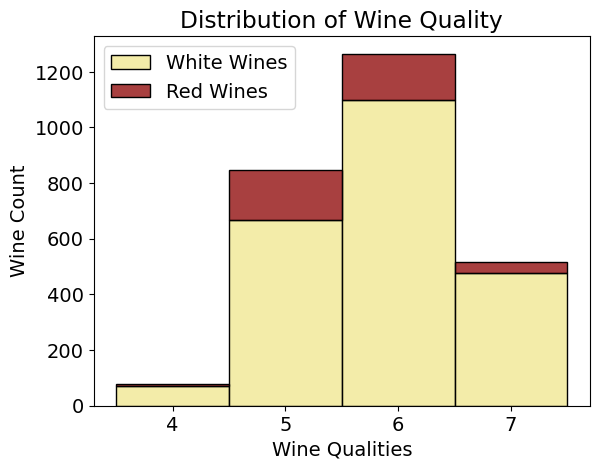

In [77]:
quality_dis()

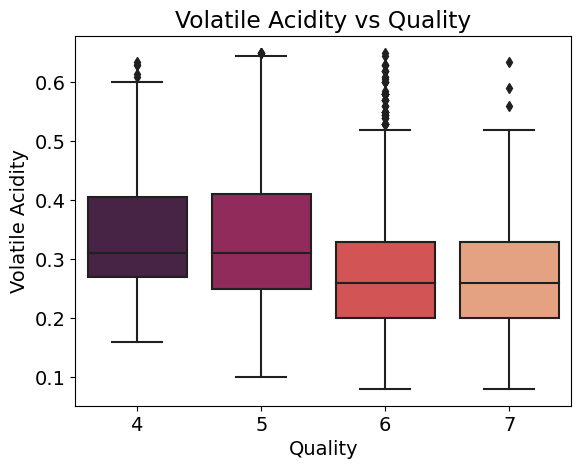

In [78]:
explore.volatile_acidity_vis(train)

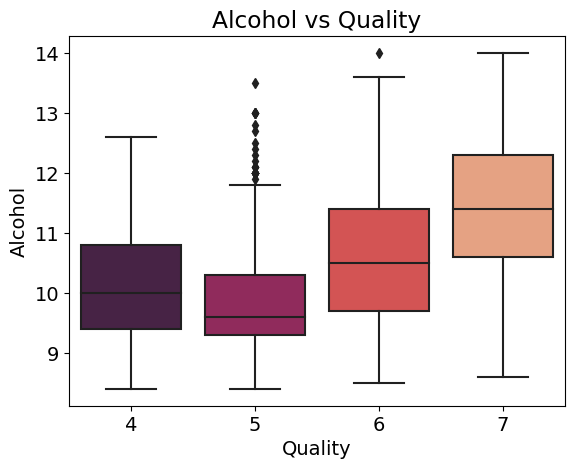

In [79]:
explore.alcohol_vis(train)